# Lazy Dependent Parameter

Execution times:

| _     | No world coordinates | World Coordinates |
|------ | -------------------- | ----------------- |
| Eager | 00:00:16| 00:10:31          | 
| Lazy  | 00:00:17             | 00:00:17          |


## Compare outputs

In [1]:
%matplotlib inline
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
eager_no_world = Table.read('/home/aalvarez/Work/Data/sim09/sim09_cat_no_world_no_fix.fits')
eager_world    = Table.read('/home/aalvarez/Work/Data/sim09/sim09_cat_world_no_fix.fits')
lazy_no_world  = Table.read('/home/aalvarez/Work/Data/sim09/sim09_cat_no_world_fix.fits')
lazy_world  = Table.read('/home/aalvarez/Work/Data/sim09/sim09_cat_world_fix.fits')

### World coordinates

In [3]:
for col in [col for col in eager_no_world.colnames if col.startswith('mf_')]:
    print('{:15s}: {}'.format(col, np.isclose(eager_no_world[col], lazy_no_world[col], rtol=1).all()))

mf_flux        : False
mf_flux_err    : False
mf_mag         : True
mf_mag_err     : True
mf_x           : True
mf_x_err       : False
mf_y           : True
mf_y_err       : False
mf_rad         : False
mf_rad_err     : False
mf_angle       : False
mf_angle_err   : False
mf_aspect      : False
mf_aspect_err  : False


# Eager vs lazy

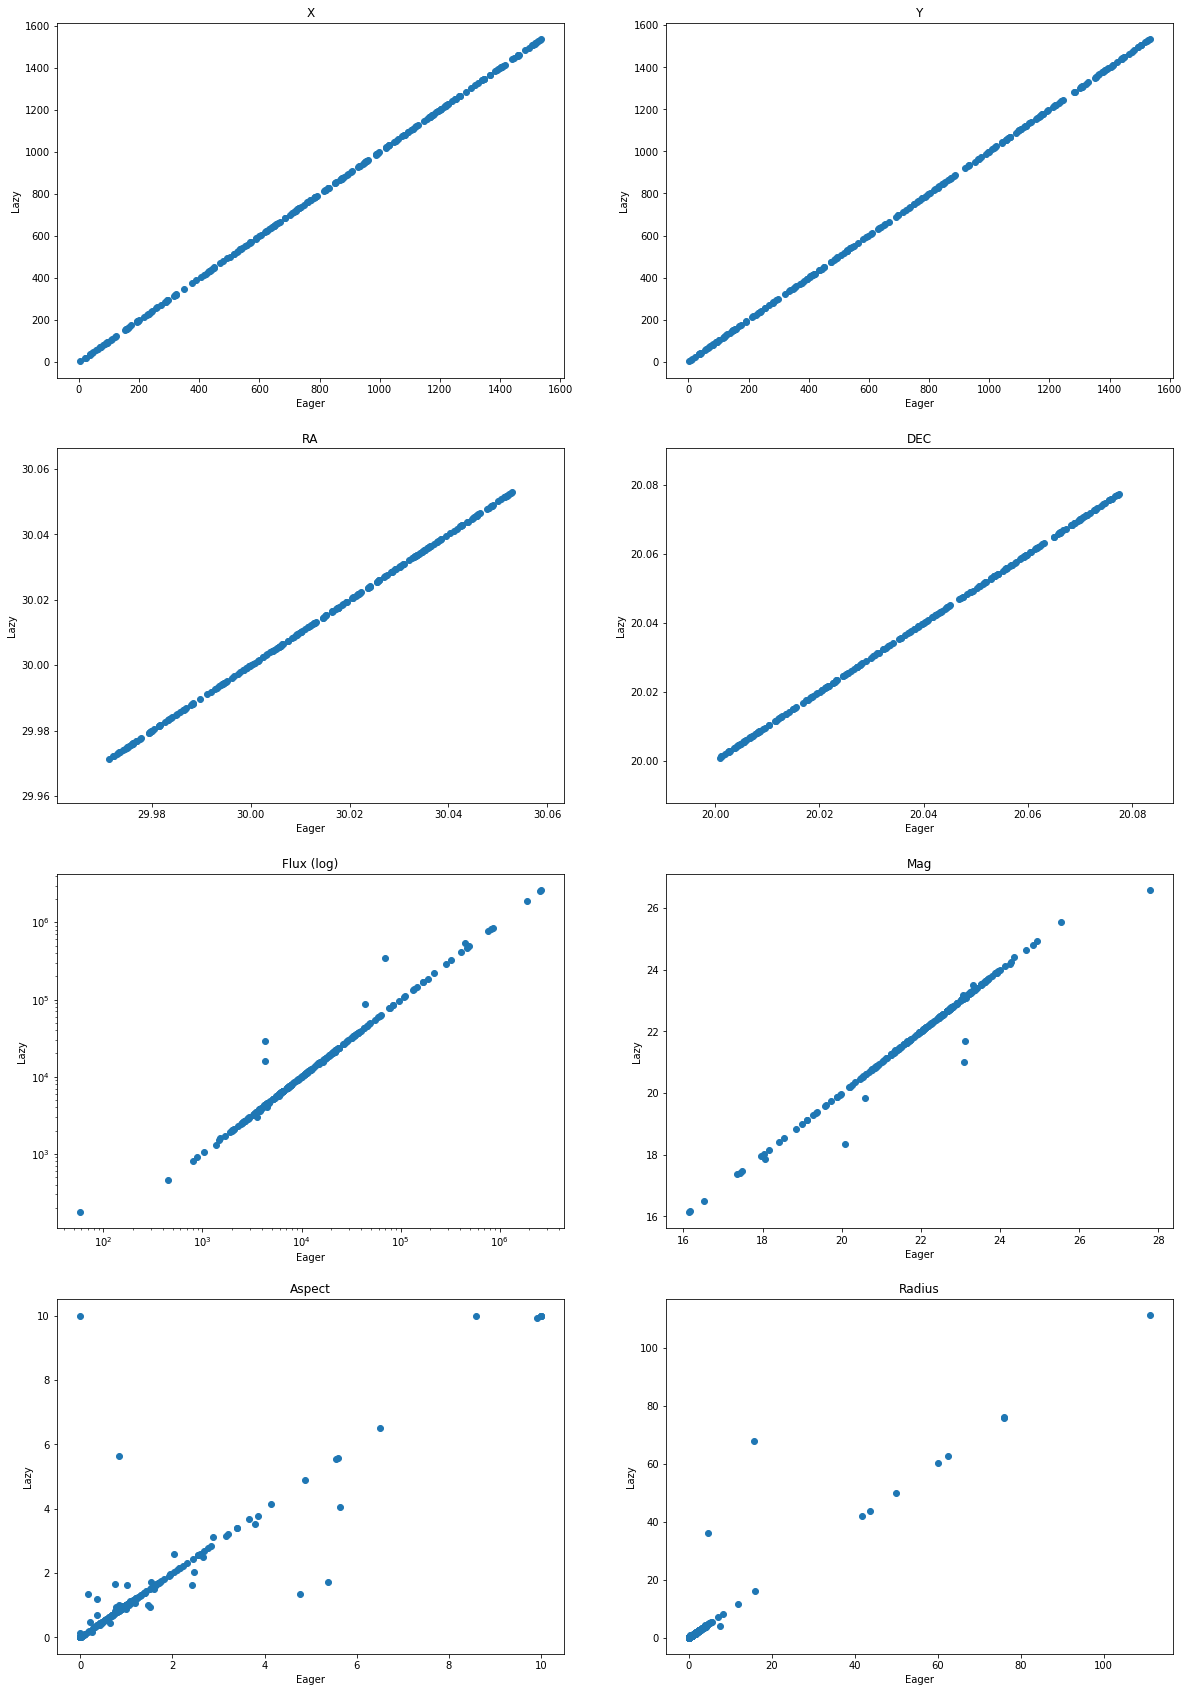

In [4]:
plt.figure(figsize=(20,30))

# X and Y
ax1 = plt.subplot(4,2,1)
ax1.scatter(eager_world['mf_x'], lazy_world['mf_x'])
ax1.set_title('X')
ax1.set_xlabel('Eager'); ax1.set_ylabel('Lazy')

ax2 = plt.subplot(4,2,2)
ax2.scatter(eager_world['mf_y'], lazy_world['mf_y'])
ax2.set_title('Y')
ax2.set_xlabel('Eager'); ax2.set_ylabel('Lazy')

# RA and DEC (Dependent!)
ax3 = plt.subplot(4,2,3)
ax3.scatter(eager_world['mf_ra'], lazy_world['mf_ra'])
ax3.set_title('RA')
ax3.set_xlabel('Eager'); ax3.set_ylabel('Lazy')

ax4 = plt.subplot(4,2,4)
ax4.scatter(eager_world['mf_dec'], lazy_world['mf_dec'])
ax4.set_title('DEC')
ax4.set_xlabel('Eager'); ax4.set_ylabel('Lazy')

# Flux and Mag (mag is dependent!)
ax5 = plt.subplot(4,2,5)
ax5.scatter(eager_world['mf_flux'], lazy_world['mf_flux'])
ax5.set_yscale('log'); ax5.set_xscale('log')
ax5.set_title('Flux (log)')
ax5.set_xlabel('Eager'); ax5.set_ylabel('Lazy')

ax6 = plt.subplot(4,2,6)
ax6.scatter(eager_world['mf_mag'], lazy_world['mf_mag'])
ax6.set_title('Mag')
ax6.set_xlabel('Eager'); ax6.set_ylabel('Lazy')

# Aspect and radius
ax7 = plt.subplot(4,2,7)
ax7.scatter(eager_world['mf_aspect'], lazy_world['mf_aspect'])
ax7.set_title('Aspect')
ax7.set_xlabel('Eager'); ax7.set_ylabel('Lazy')

ax8 = plt.subplot(4,2,8)
ax8.scatter(eager_world['mf_rad'], lazy_world['mf_rad'])
ax8.set_title('Radius')
ax8.set_xlabel('Eager'); ax8.set_ylabel('Lazy')

plt.show()

## Compare two runs of eager, as baseline

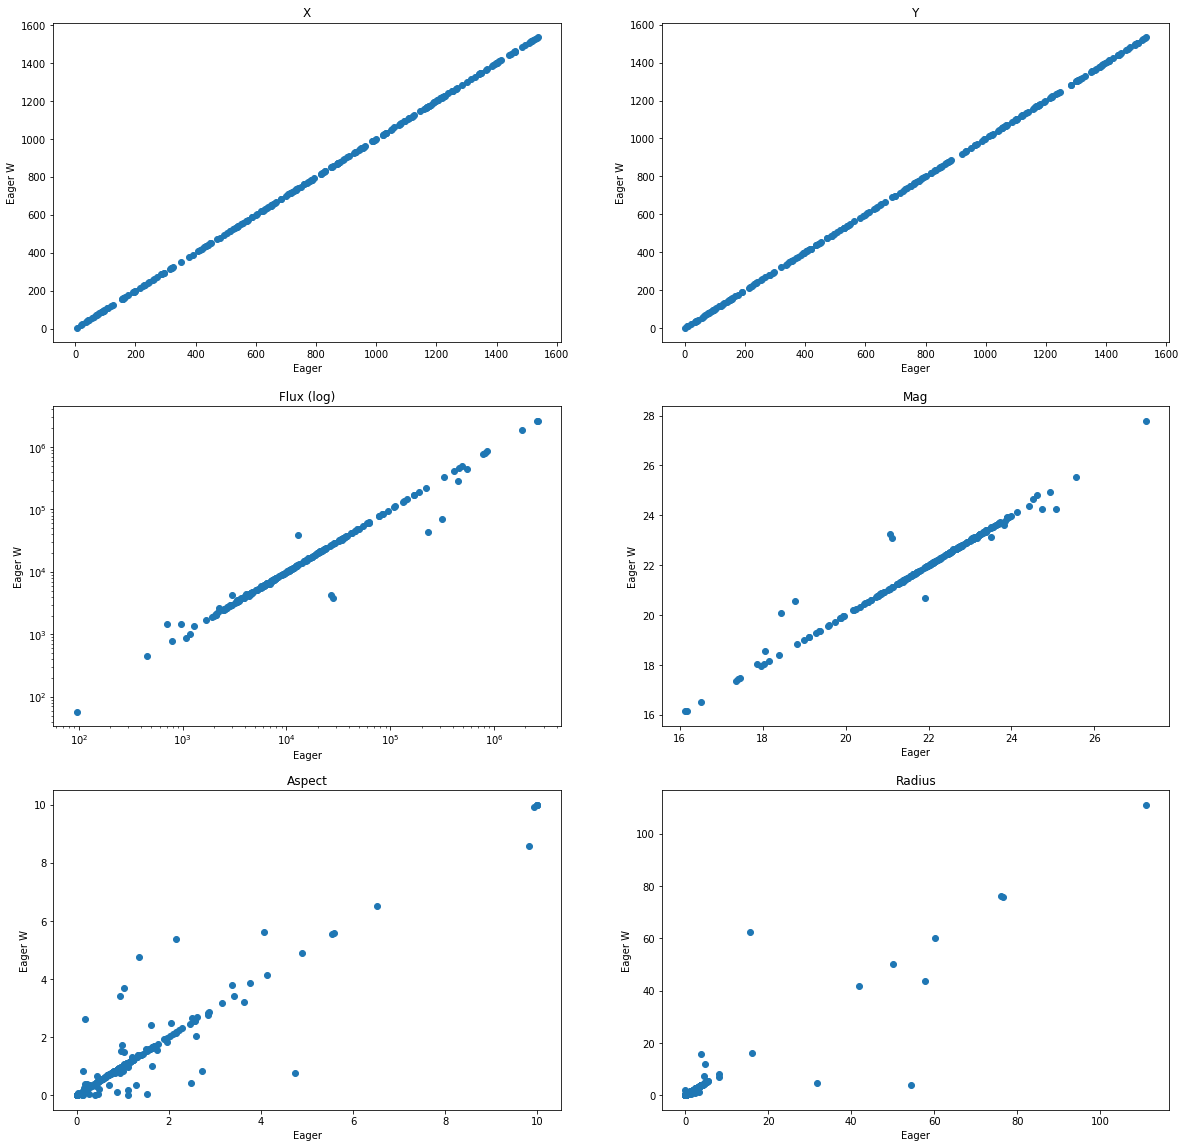

In [5]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(3,2,1)
ax1.scatter(eager_no_world['mf_x'], eager_world['mf_x'])
ax1.set_title('X')
ax1.set_xlabel('Eager'); ax1.set_ylabel('Eager W')

ax2 = plt.subplot(3,2,2)
ax2.scatter(eager_no_world['mf_y'], eager_world['mf_y'])
ax2.set_title('Y')
ax2.set_xlabel('Eager'); ax2.set_ylabel('Eager W')

ax3 = plt.subplot(3,2,3)
ax3.scatter(eager_no_world['mf_flux'], eager_world['mf_flux'])
ax3.set_yscale('log'); ax3.set_xscale('log')
ax3.set_title('Flux (log)')
ax3.set_xlabel('Eager'); ax3.set_ylabel('Eager W')

ax4 = plt.subplot(3,2,4)
ax4.scatter(eager_no_world['mf_mag'], eager_world['mf_mag'])
ax4.set_title('Mag')
ax4.set_xlabel('Eager'); ax4.set_ylabel('Eager W')

ax5 = plt.subplot(3,2,5)
ax5.scatter(eager_no_world['mf_aspect'], eager_world['mf_aspect'])
ax5.set_title('Aspect')
ax5.set_xlabel('Eager'); ax5.set_ylabel('Eager W')

ax6 = plt.subplot(3,2,6)
ax6.scatter(eager_no_world['mf_rad'], eager_world['mf_rad'])
ax6.set_title('Radius')
ax6.set_xlabel('Eager'); ax6.set_ylabel('Eager W')

plt.show()